<a href="https://colab.research.google.com/github/Rohithkr02/fashion-prediction/blob/main/cnnfashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

9


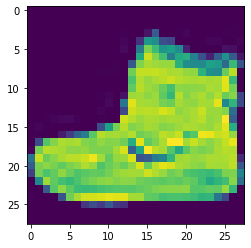

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
print(y_train[0])

In [ ]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [ ]:
train_norm=X_train/255
test_norm=X_test/255

In [ ]:
import keras
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_norm,y_train,batch_size=6000,epochs=10)

Epoch 1/10
10/10 [==============================] - 12s 61ms/step - loss: 2.2540 - accuracy: 0.2382
Epoch 2/10
10/10 [==============================] - 1s 65ms/step - loss: 2.0888 - accuracy: 0.2726
Epoch 3/10
10/10 [==============================] - 1s 64ms/step - loss: 1.8426 - accuracy: 0.2794
Epoch 4/10
10/10 [==============================] - 1s 65ms/step - loss: 1.5910 - accuracy: 0.3234
Epoch 5/10
10/10 [==============================] - 1s 60ms/step - loss: 1.3484 - accuracy: 0.4522
Epoch 6/10
10/10 [==============================] - 1s 59ms/step - loss: 1.1401 - accuracy: 0.5973
Epoch 7/10
10/10 [==============================] - 1s 58ms/step - loss: 0.9626 - accuracy: 0.6855
Epoch 8/10
10/10 [==============================] - 1s 59ms/step - loss: 0.8241 - accuracy: 0.7237
Epoch 9/10
10/10 [==============================] - 1s 59ms/step - loss: 0.7392 - accuracy: 0.7468
Epoch 10/10
10/10 [==============================] - 1s 58ms/step - loss: 0.6837 - accuracy: 0.7635


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 10)                8

In [ ]:
import numpy as np
from keras.utils import load_img
from keras.utils import img_to_array
def load_im(filename,target_size=(28,28)):
  img=load_img(filename,grayscale=True,target_size=target_size)
  img_array=img_to_array(img)
  img=img_array.reshape(1,28,28,1)
  img=img/255.0
  return img
def predict_new(filename,model):
  img=load_im(filename)
  result=model.predict(img)
  dic={0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'sandal',6:'Shirt',
       7:'Sneaker',8:'Bag',9:'Ankle boot'}
  max=np.argmax(result)
  print(dic[max])

In [ ]:
predict_new('/content/images (6).jpeg',model)

1/1 [==============================] - 0s 131ms/step
Ankle boot


/usr/local/lib/python3.9/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(
